In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import random
import os


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# cd '/content/drive/MyDrive/281 Project/Bone Break Classification'


In [3]:
root = 'data/'

hairline = root + 'Hairline Fracture/Train'
spiral = root + 'Spiral Fracture/Train'
greenstick = root + 'Greenstick fracture/Train'
comminuted = root + 'Comminuted fracture/Train'
dislocation = root + 'Fracture Dislocation/Train'
pathological = root + 'Pathological fracture/Train'
longitudinal = root + 'Longitudinal fracture/Train'
oblique = root + 'Oblique fracture/Train'
impacted = root + 'Impacted fracture/Train'
avulsion = root + 'Avulsion fracture/Train'

In [4]:
def get_random_image(filepath):
  all_files = os.listdir(filepath)
  rand_image_file = random.choice(all_files)
  return os.path.join(filepath, rand_image_file)

In [5]:
hairline_img = get_random_image(hairline)
spiral_img = get_random_image(spiral)
greenstick_img = get_random_image(greenstick)
comminuted_img = get_random_image(comminuted)
dislocation_img = get_random_image(dislocation)
pathological_img = get_random_image(pathological)
longitudinal_img = get_random_image(longitudinal)
oblique_img = get_random_image(oblique)
impacted_img = get_random_image(impacted)
avulsion_img = get_random_image(avulsion)

In [6]:
def hist_plot(rand_img, name):
  image = cv2.imread(rand_img)
  if len(image.shape) == 2:
      # Grayscale image
      channel_axis = None
  else:
      # Color image
      channel_axis = -1
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, channel_axis=channel_axis)
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  # Plot the original image
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.title(f'Original Image: {name}')
  plt.imshow(image, cmap='gray')
  plt.axis('off')

  # Plot the HOG image
  plt.subplot(1, 3, 2)
  plt.title('HOG Image')
  plt.imshow(hog_image_rescaled, cmap='gray')
  plt.axis('off')

  # Compute and plot the histogram of intensities
  plt.subplot(1, 3, 3)
  plt.title('Histogram of Intensities')
  plt.hist(image.ravel(), bins=256, range=[0, 256])
  plt.xlabel('Pixel Intensity')
  plt.ylabel('Frequency')

  # Show all plots
  plt.tight_layout()
  plt.show()

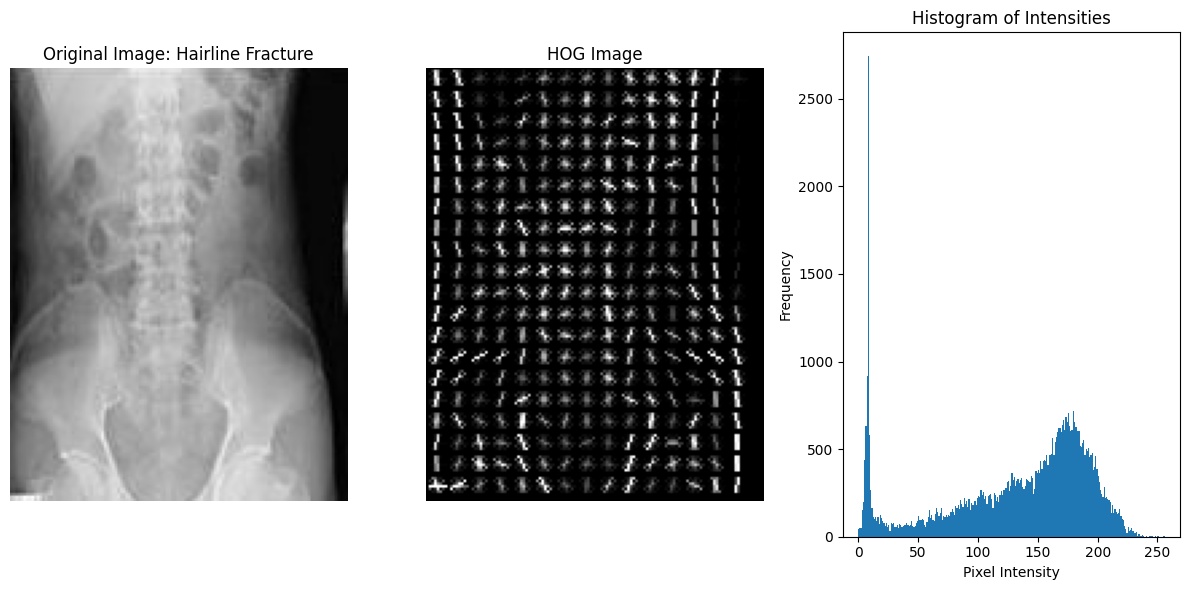

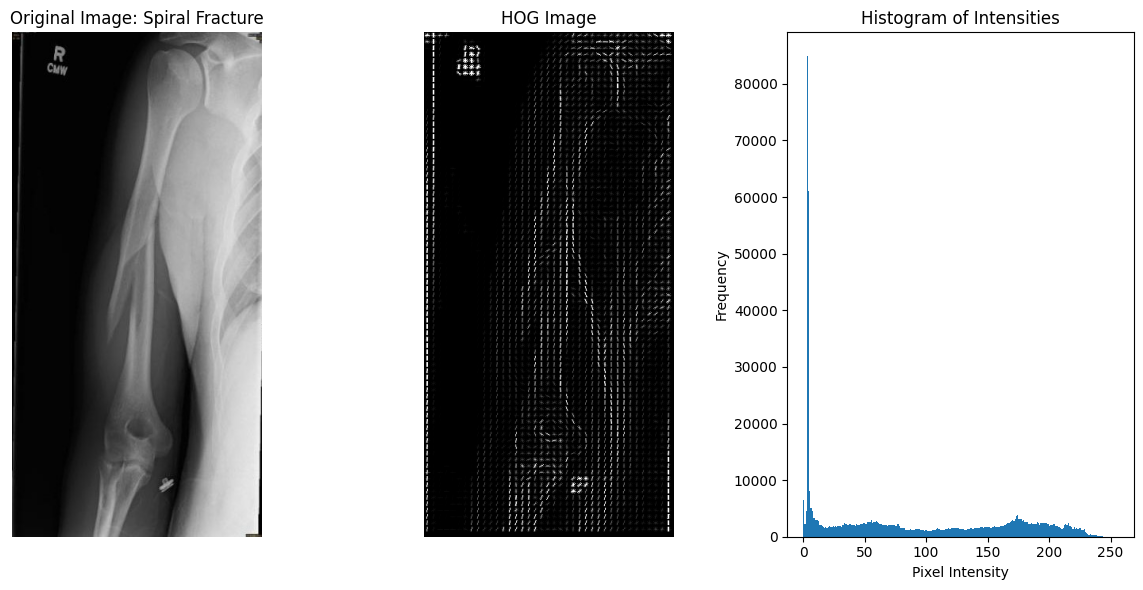

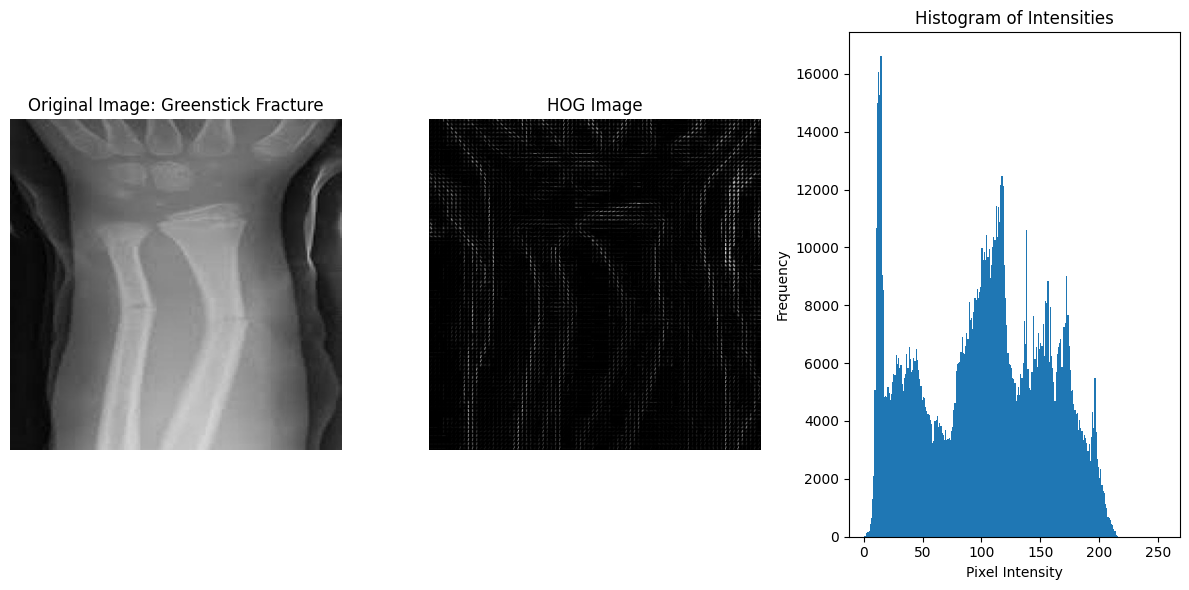

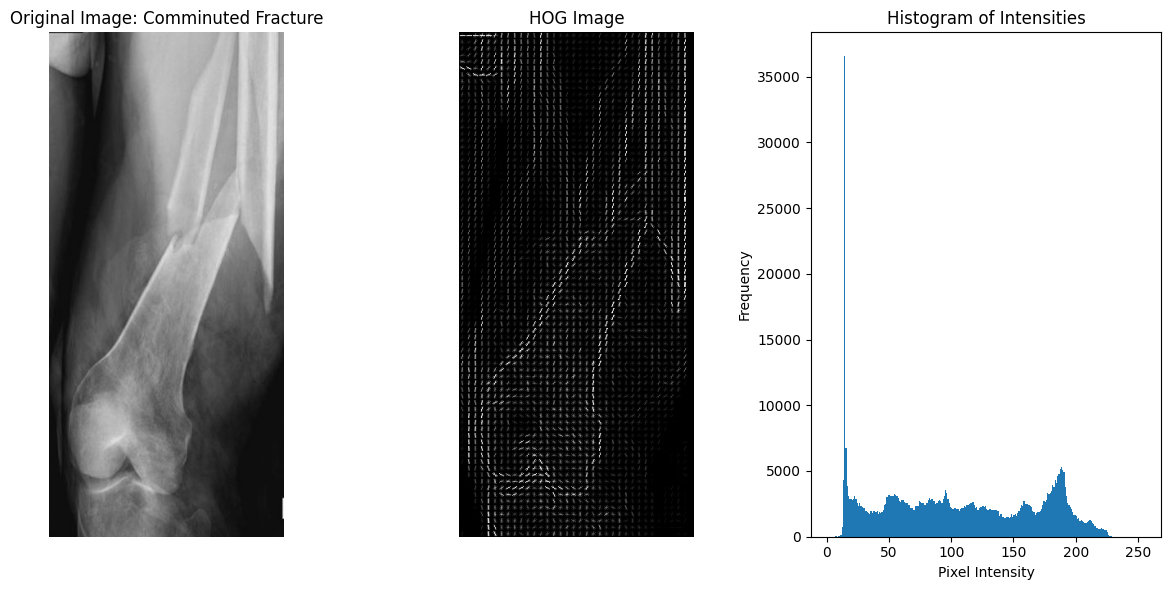

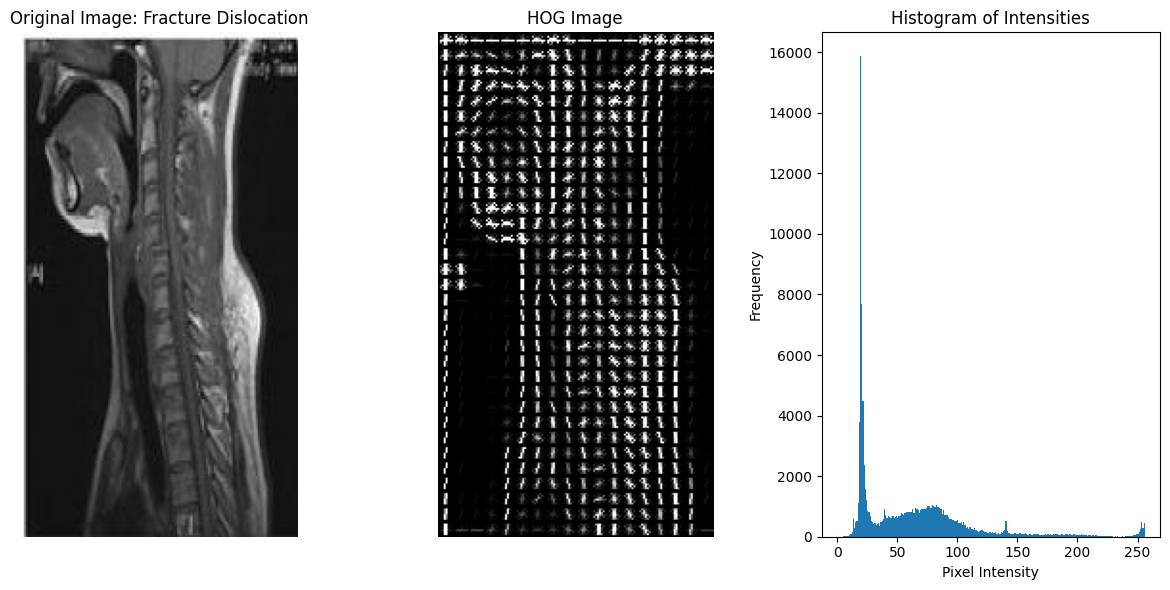

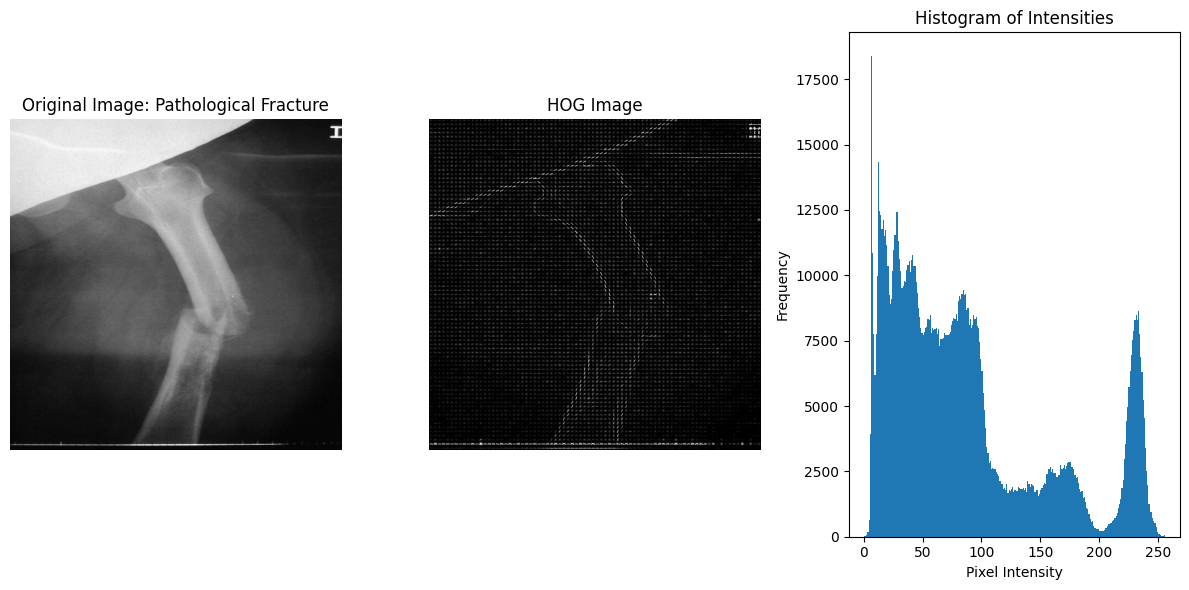

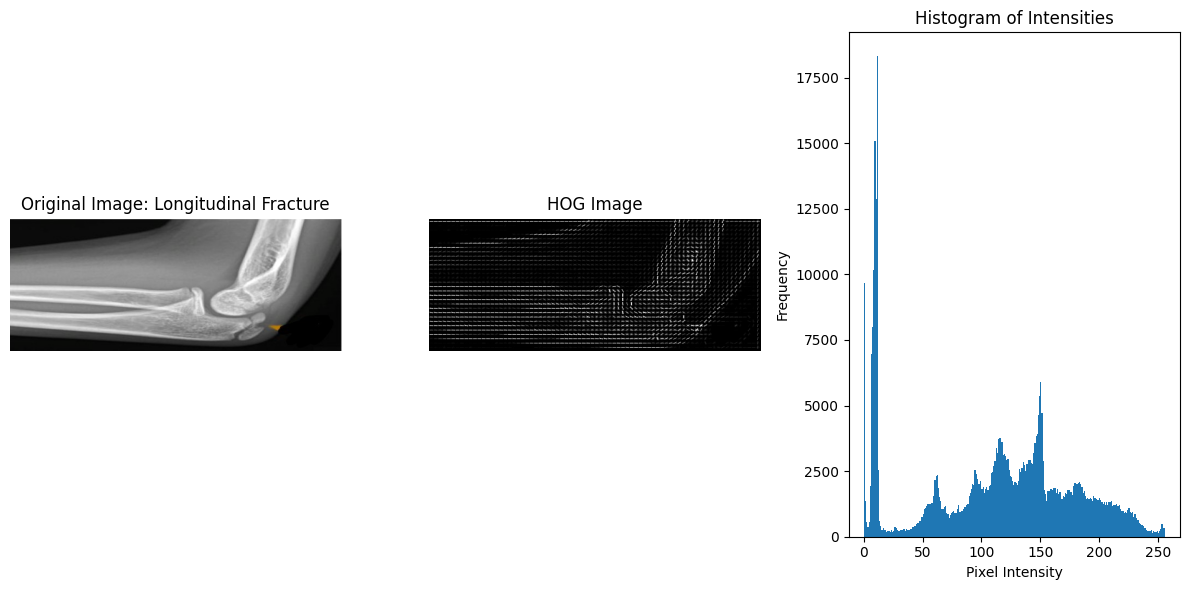

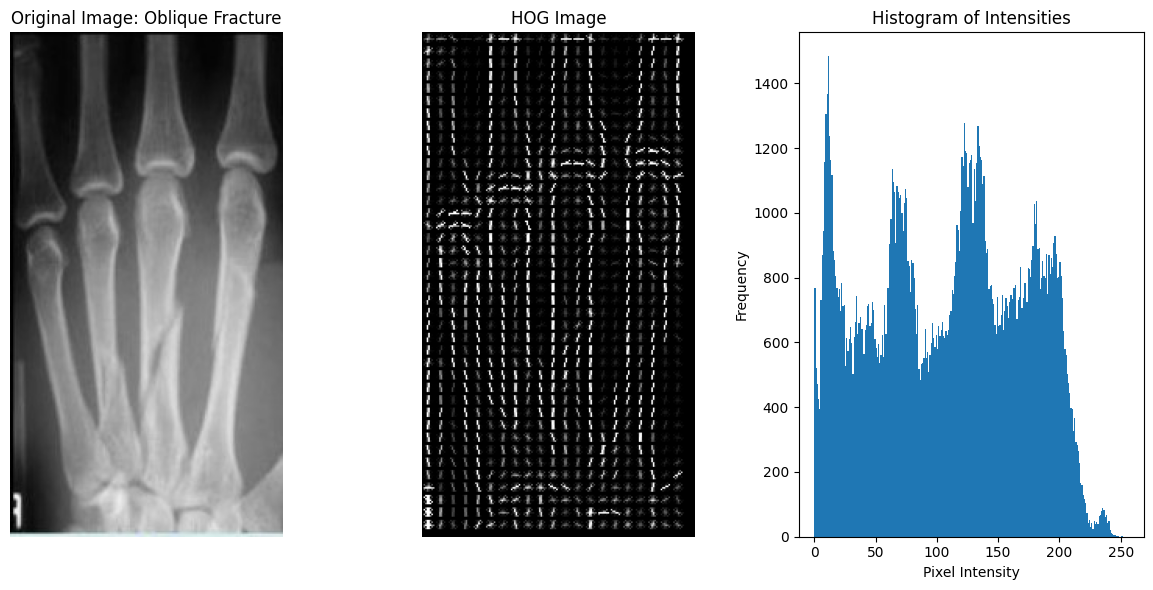

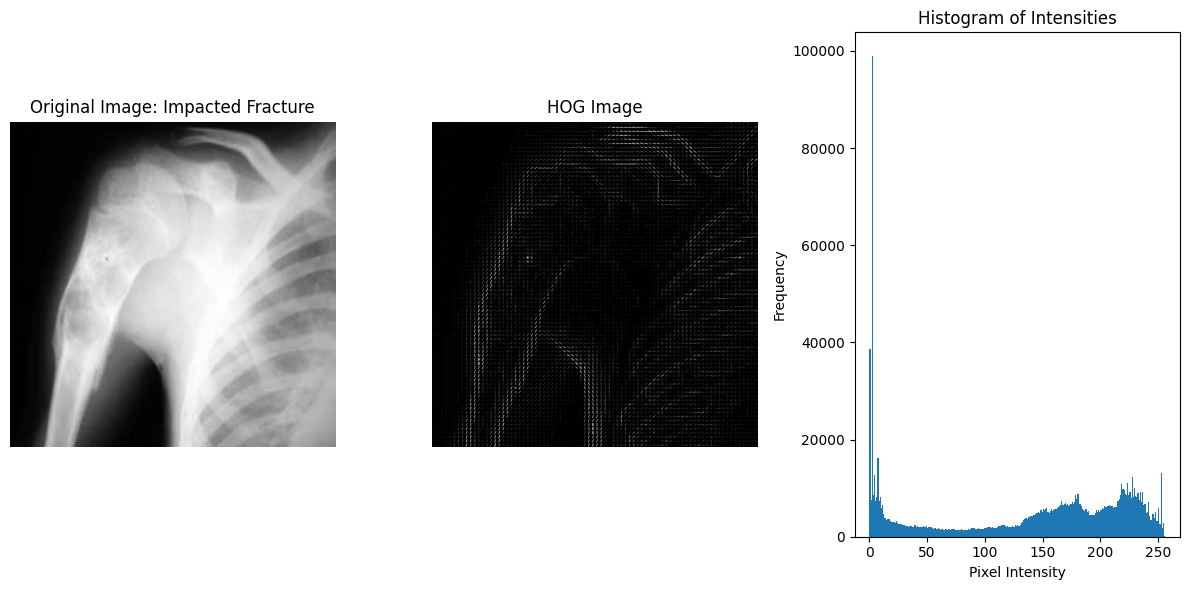

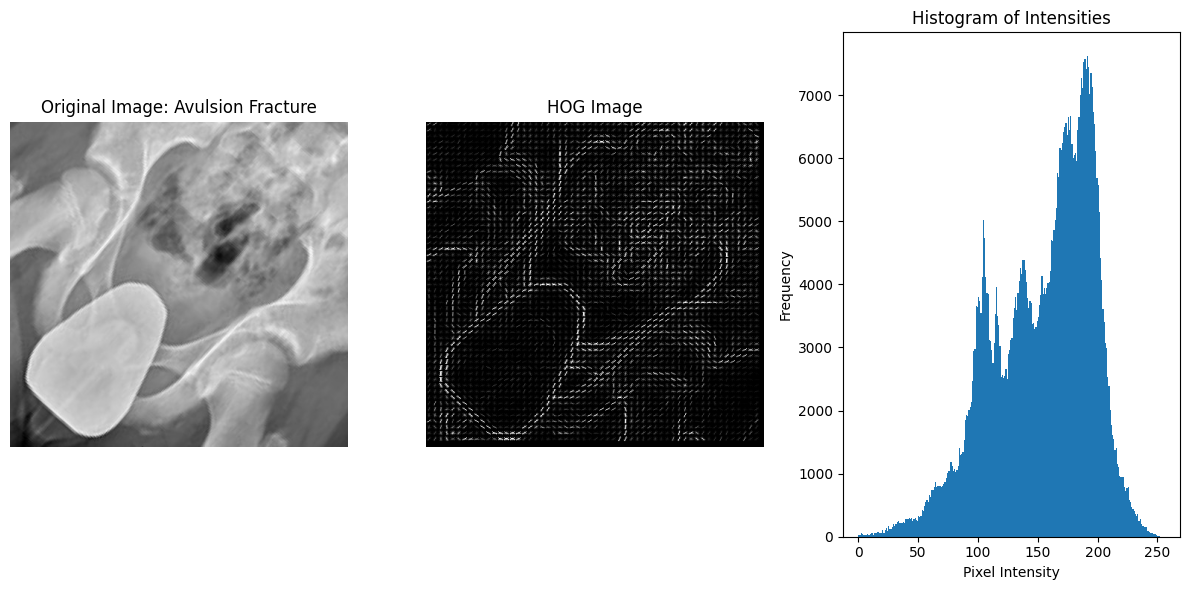

In [7]:
hist_plot(hairline_img, 'Hairline Fracture')
hist_plot(spiral_img, 'Spiral Fracture')
hist_plot(greenstick_img, 'Greenstick Fracture')
hist_plot(comminuted_img, 'Comminuted Fracture')
hist_plot(dislocation_img, 'Fracture Dislocation')
hist_plot(pathological_img, 'Pathological Fracture')
hist_plot(longitudinal_img, 'Longitudinal Fracture')
hist_plot(oblique_img, 'Oblique Fracture')
hist_plot(impacted_img, 'Impacted Fracture')
hist_plot(avulsion_img, 'Avulsion Fracture')